# 读取数据

In [72]:
import pandas as pd
from pandas import Series,DataFrame

In [76]:
data = pd.read_csv('./data/housing_with_type.csv')
del data['Unnamed: 0']

In [77]:
data.head()

,district,type,metro_num,S,mon_price,聚类类别
0,徐汇,整租,173.0,42.00,4830,高端房源
1,徐汇,整租,757.0,68.65,5130,高端房源
2,徐汇,整租,236.0,30.37,4690,高端房源
3,徐汇,整租,243.0,49.15,4790,高端房源
4,徐汇,整租,488.0,33.17,4490,高端房源


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14034 entries, 0 to 14033
Data columns (total 6 columns):
district     14034 non-null object
type         14034 non-null object
metro_num    14034 non-null float64
S            14034 non-null float64
mon_price    14034 non-null int64
聚类类别         14034 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 657.9+ KB


---

# 添加上海各区人口密度作为一个变量

In [79]:
data.district.value_counts().index

Index(['浦东', '宝山', '闵行', '嘉定', '松江', '普陀', '徐汇', '杨浦', '长宁', '闸北', '虹口', '黄浦',
       '青浦', '静安'],
      dtype='object')

### 上海各区人口密度（人/平方公里）

In [80]:
#density = [4523,7465,6845,3378,2906,23491,19889,21657,18044,28609,34501,32190,1804,31089]
#density_Series = Series(density,index=data.district.value_counts().index)

In [81]:
#density_Series
#data.insert(5,'人口密度',density_Series)
data['density']=data['district']

In [82]:
density_shift = {
    '浦东':int(4523),
    '宝山':int(1925),
    '闵行':int(6845),
    '嘉定':int(3378),
    '松江':int(2906),
    '普陀':int(23491),
    '徐汇':int(19889),
    '杨浦':int(21657),
    '长宁':int(18044),
    '闸北':int(28609),
    '虹口':int(34501),
    '黄浦':int(32190),
    '青浦':int(1804),
    '静安':int(31089)
}

In [83]:
data['density'] = data['density'].map(density_shift)
data.head()

,district,type,metro_num,S,mon_price,聚类类别,density
0,徐汇,整租,173.0,42.00,4830,高端房源,19889
1,徐汇,整租,757.0,68.65,5130,高端房源,19889
2,徐汇,整租,236.0,30.37,4690,高端房源,19889
3,徐汇,整租,243.0,49.15,4790,高端房源,19889
4,徐汇,整租,488.0,33.17,4490,高端房源,19889


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14034 entries, 0 to 14033
Data columns (total 7 columns):
district     14034 non-null object
type         14034 non-null object
metro_num    14034 non-null float64
S            14034 non-null float64
mon_price    14034 non-null int64
聚类类别         14034 non-null object
density      14034 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 767.6+ KB


## 存储到csv

In [85]:
housing = data.copy()

In [86]:
housing.to_csv('shanghai_housing_density.csv')

---

# 数据探索

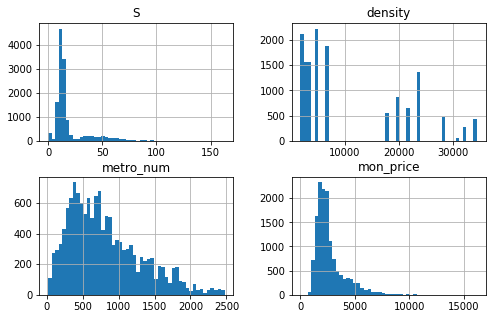

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(8,5))
plt.show()

## 相关性分析

### 查找关联

In [88]:
corr_matrix = housing.corr()

In [89]:
corr_matrix["mon_price"].sort_values(ascending=False)

mon_price    1.000000
S            0.810212
density      0.410287
metro_num   -0.303725
Name: mon_price, dtype: float64

### 散点矩阵

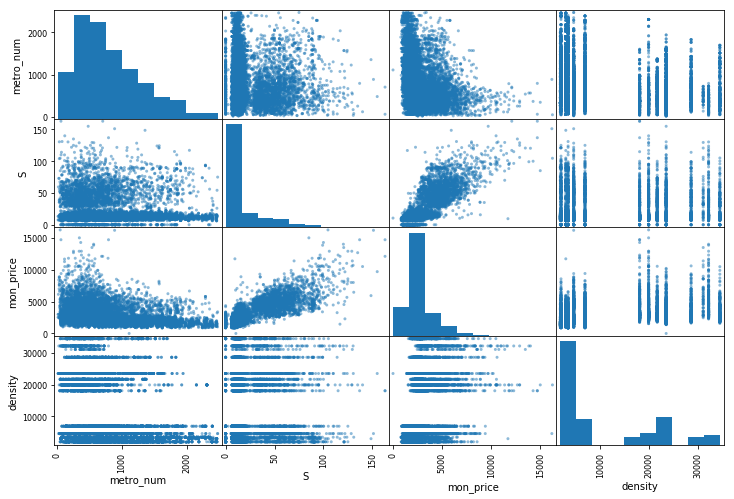

In [90]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
# metro_num S mon_price聚类类别人口密度
attributes = ['metro_num','S','mon_price','density']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

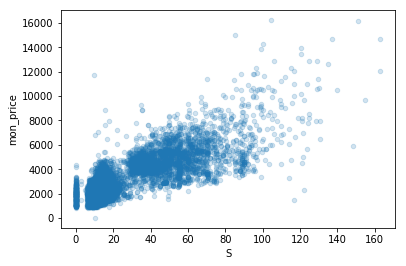

In [98]:
housing.plot(kind="scatter", x="S", y="mon_price",alpha=0.2)
plt.show()

 - **月租价格**与**面积**相关度最大，与**人口密度**有相关性，与**距离地铁站距离**负相关

# 划分训练集和测试集

In [100]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [106]:
#train_set['district'].value_counts()

# 为机器学习算法准备数据

In [150]:
housing_train = train_set.drop("mon_price",axis=1)
housing_train.head()

,district,type,metro_num,S,聚类类别,density
7971,黄浦,合租,72.0,15.0,交通便利普通,32190
11591,松江,合租,652.0,9.5,交通一般普通,2906
4949,嘉定,合租,218.0,8.1,交通便利普通,3378
11527,松江,合租,1352.0,13.2,交通不便普通,2906
8678,闵行,合租,1070.0,14.1,交通一般普通,6845


In [152]:
housing_cat = housing_train[['聚类类别']]
housing_num = housing_train[['metro_num','S','density']]

In [153]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_train = cat_encoder.fit_transform(housing_cat).toarray()
housing_cat_train

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [154]:
cat_encoder.categories_

[array(['交通一般普通', '交通不便普通', '交通便利普通', '豪宅', '高端房源'], dtype=object)]

## 标准化后的数据

In [158]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

housing_num_train = std_scaler.fit_transform(housing_num)

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\13626\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [159]:
housing_num_train

array([[-1.47038578, -0.27187039,  2.13530679],
       [-0.32056579, -0.5624829 , -0.77691754],
       [-1.18094833, -0.63645699, -0.72997826],
       ...,
       [-0.74282727, -0.0235288 , -0.77691754],
       [-0.95296678,  3.65773908, -0.61611073],
       [-0.20360134, -0.29828971, -0.87447567]])

In [164]:
#std_scaler.inverse_transform(housing_num_train,copy=True)
# 反标准化

## 准备好的训练数据

In [163]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["聚类类别"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_train)
housing_prepared

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\13626\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.47038578, -0.27187039,  2.13530679, ...,  1.        ,
         0.        ,  0.        ],
       [-0.32056579, -0.5624829 , -0.77691754, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18094833, -0.63645699, -0.72997826, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.74282727, -0.0235288 , -0.77691754, ...,  1.        ,
         0.        ,  0.        ],
       [-0.95296678,  3.65773908, -0.61611073, ...,  0.        ,
         1.        ,  0.        ],
       [-0.20360134, -0.29828971, -0.87447567, ...,  0.        ,
         0.        ,  0.        ]])

In [160]:
#std_scaler.inverse_transform(housing_num_train,copy=True)
# 反标准化
price_label = train_set['mon_price'].values
price_label

array([3960, 1330, 1890, ..., 1960, 7790, 2090], dtype=int64)

In [145]:
housing_prepared.shape

(11227, 4)

In [146]:
label_prepared.shape

(11227,)

# 线性回归模型

In [168]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, price_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 误差检验

In [170]:
from sklearn.metrics import mean_squared_error
import numpy as np

price_pred_lin = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(price_label, price_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

621.4467697013713

线性回归模型误差约为：**621.4**

---

# 决策树模型

In [165]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, price_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

### 误差检验

In [171]:
price_pred_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(price_label, price_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

57.68255593248203

决策树模型误差仅仅为：**57.68**???

很大可能是**过拟合**了

### 交叉验证

In [172]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, price_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [173]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [587.84946044 532.62760842 519.33701302 584.09419567 516.96573747
 568.67374508 615.49379378 586.63664029 610.86577724 656.37117204]
Mean: 577.8915143454734
Standard deviation: 42.60137279631591


交叉验证平均误差：**577.89**

---

# 随机森林

In [174]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, price_label)

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [175]:
price_pred_forest = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(price_label, price_pred_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

201.66319626596618

### 交叉验证

In [176]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, price_label,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [458.68576405 464.35061662 420.47069325 481.4484672  405.20731778
 494.58559271 531.54975134 465.44652337 475.66316252 594.09335653]
Mean: 479.1501245368735
Standard deviation: 50.94092748254383


交叉验证平均误差：**479.15**

**随机森林效果最好。**

---

# 基于最优模型的参数微调

In [178]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, price_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

### 获取最优参数

In [179]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

### 显示全部参数和结果

In [180]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [181]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

512.767071184117 {'max_features': 2, 'n_estimators': 3}
463.60831234338804 {'max_features': 2, 'n_estimators': 10}
451.97665223181787 {'max_features': 2, 'n_estimators': 30}
509.87920013251806 {'max_features': 4, 'n_estimators': 3}
468.7075640506862 {'max_features': 4, 'n_estimators': 10}
455.36184144199206 {'max_features': 4, 'n_estimators': 30}
508.1451189306186 {'max_features': 6, 'n_estimators': 3}
465.9997391357814 {'max_features': 6, 'n_estimators': 10}
461.63459913013565 {'max_features': 6, 'n_estimators': 30}
518.1969687743225 {'max_features': 8, 'n_estimators': 3}
480.414004482542 {'max_features': 8, 'n_estimators': 10}
470.7064691143531 {'max_features': 8, 'n_estimators': 30}
503.19559916178787 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
472.7140880022182 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
508.0602506102356 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
479.94872092615424 {'bootstrap': False, 'max_features': 3, 'n_estimators

**max_features: 2**, **n_estimators: 30**时，效果最好，为**451.98**

---